<a href="https://colab.research.google.com/github/k3ssdev/IABD_PIA/blob/main/PIA_01_Tarea_Alberto_Perez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programación de Inteligencia Artificial


## Actividad 1

Realizar un **Análisis Exploratorio de Datos** usando un `dataset` de ejemplo del módulo de Python `seaborn`.

In [2]:
# ==================
# Asignatura: Programación de Inteligencia Artifical
# Actividad: Unidad 1 - Análisis Exploratorio de Datos
# Autor: Alberto Pérez
# Fecha: 2024-11-13
# ==================


### Librerías principales
Primero, se importan las librerías necesarias para el análisis: `pandas` para la manipulación de datos, `numpy` para operaciones matemáticas y estadísticas, `seaborn` para la creación de visualizaciones estadísticas, y `matplotlib.pyplot` (importado como `plt`) para generar gráficos de bajo nivel.

También se importan varias clases de la librería sklearn (Scikit-Learn), que contiene herramientas para realizar transformaciones y análisis estadísticos:

* `PCA` (Principal Component Analysis) de `sklearn.decomposition`: realiza el análisis de componentes principales, una técnica de reducción de dimensionalidad que proyecta los datos en un conjunto más pequeño de variables (componentes principales) que explican la mayor parte de la variabilidad del dataset. PCA ayuda a identificar patrones en los datos y simplificar visualizaciones.

* `StandardScaler` de `sklearn.preprocessing`: permite estandarizar los datos, es decir, ajustar las características para que tengan media 0 y desviación estándar 1. Esta transformación es especialmente útil para algoritmos como PCA, que son sensibles a la escala de los datos.

* `SimpleImputer` de `sklearn.impute`: permite imputar o reemplazar valores faltantes en un conjunto de datos. Se pueden utilizar diversas estrategias de imputación, como la media, la mediana o la moda, lo cual es útil para completar datos antes de aplicar análisis estadísticos.

Con el método `get_dataset_names` de seaborn, se obtiene la lista de conjuntos de datos de ejemplo disponibles en la librería. Estos datasets pueden ser cargados fácilmente con `sns.load_dataset`("nombre_del_dataset") y se utilizan comúnmente para exploración, pruebas de visualización y análisis estadístico en un entorno controlado.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Mostrar lista de dataasets de ejemplo en seaborn
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

### 2. Revisión de columnas del dataset

Se selecciona el `dataset` de **planets** y se realiza una inspección inicial de las columnas para identificar si es necesario eliminar aquellas que no sean relevantes para el análisis. El método `load_dataset` de Seaborn ya carga el conjunto de datos como un DataFrame de pandas, por lo que no es necesario ejecutar `pd.DataFrame()` para ello.

Para ello, se utiliza el atributo `columns` para mostrar las columnas o *features* del conjunto de datos.

In [4]:
df = sns.load_dataset('planets')  # Seleccionar el dataset de planetas y cargarlo en un Dataframe
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

En esta primera inspección, no se observa la necesidad de eliminar ninguna columna, ya que todas parecen relevantes para el análisis.

### 3. Análisis estadístico inicial

Es necesario hacer un análisis inicial con los métodos `info` y `describe`, además de una revisión de los datos que no sean puramente numéricos con el método `unique`.

Se comienza con el método `info`, que proporciona una vista general de la estructura del conjunto de datos, incluyendo detalles importantes como el número de filas, el tipo de datos de cada columna, y cuántos valores no nulos hay en cada columna.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


La columna `method` es una cadena de texto, y se verifica que no hay valores nulos en el dataset (los cuales habría que limpiar en caso de tenerlos).

Con el método `unique` aplicado a la columna del conjunto de datos, podemos obtener los valores sin duplicados para hacernos una idea más clara del contenido que tiene.

Los datos de la serie `method` sugieren que es un buen candidato de `label` para un futuro modelo de predicción por método de observación.

In [6]:
df.method.unique() # Obtener los valores únicos de la columna 'method'

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

Con el método `describe` se utiliza para generar un resumen estadístico de las columnas numéricas en un conjunto de datos.

Proporciona información clave sobre la distribución de los datos, como la cantidad de valores no nulos, la media, la desviación estándar, los percentiles y los valores mínimos y máximos.

In [7]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


También es útil para obtener información concreta de una columna.

In [8]:
df.method.describe()

,method
count,1035
unique,10
top,Radial Velocity
freq,553


En este primer análisis de los datos se observa que hay 1035 valores no nulos en la columna `number`, con una media de `1.785507` en lo que parece ser el número de planetas obtenidos por método de observación `method`, lo que quiere decir que la mayoría de los métodos tienen solamente un planeta.

En `orbital_period` se observa que la desviación estándar es muy alta (`26014.728304`), lo que indica una gran variabilidad en los períodos orbitales, algunos de los cuales pueden ser muy largos o muy cortos.

La columna `mass` expresa la masa de los exoplanetas en unidades de la masa de Júpiter, donde 1 representa la masa de Júpiter. Aquí tambien se observa una fuerte variabilidad de los datos debido a la desiación estándar de los valores.

La distancia `distance` se suele expresar en `años/luz` para las observaciones de exoplanetas y objetos estelares. Hay gran variedad de resultados entre la distancia minima y la máxima.

Finalmente, la columna `year` parece representar el año de descubrimiento de los exoplanetas, con valores que van desde 1989 hasta 2014. La media es aproximadamente 2009, lo que sugiere que la mayoría de los exoplanetas fueron descubiertos cerca de la fecha máxima. Además, la desviación estándar indica que los descubrimientos se concentraron en un intervalo de pocos años.

A continuación, se obtiene con `head` una muestra de los primero datos de la tabla:

In [9]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [10]:
# Agrupar los datos por método de observación y contar la cantidad de planetas descubiertos por cada método.
method_counts = df.groupby('method')['method'].count().sort_values(ascending=False)
method_counts

,method
method,
Radial Velocity,553
Transit,397
Imaging,38
Microlensing,23
Eclipse Timing Variations,9
Pulsar Timing,5
Transit Timing Variations,4
Orbital Brightness Modulation,3
Astrometry,2


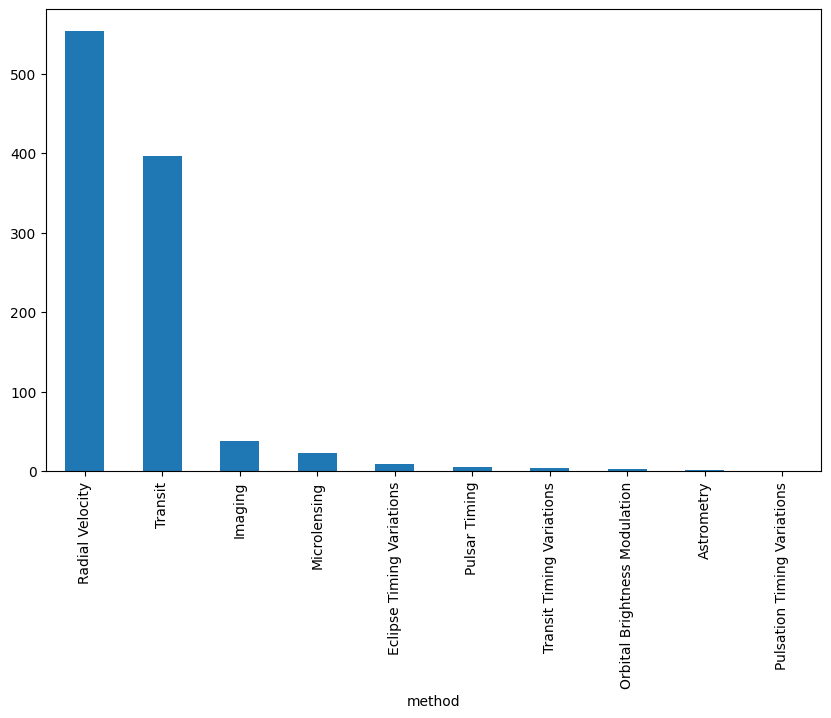

In [11]:
plt.figure(figsize=(10,6))  # Cambia el tamaño de la figura (ancho, alto)
method_counts.plot(kind='bar',x='method',y='count') # Crear grafico de barras de recuento por metodo de observacion
plt.show() # Mostrar el grafico

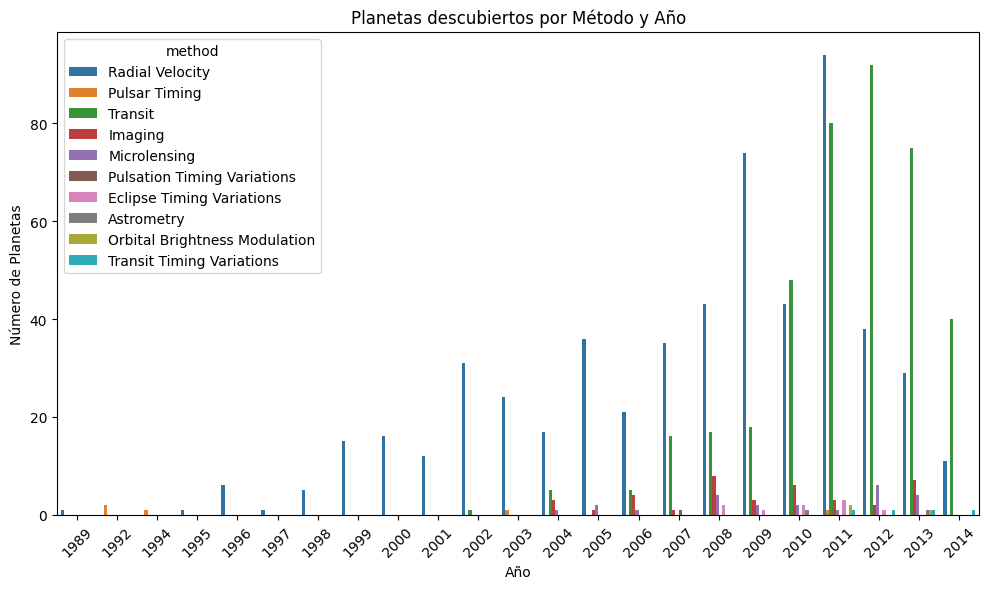

In [12]:
# Agrupar por metodo y año
planet_counts = df.groupby(['method', 'year'])['number'].count().reset_index()
planet_counts.describe

# Crear grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='number', hue='method', data=planet_counts)
plt.xlabel('Año')
plt.ylabel('Número de Planetas')
plt.title('Planetas descubiertos por Método y Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Outliers - datos atípicos

Se analizan las variables numéricas del conjunto de datos para obtener muestra una presencia significativa de valores atípicos. Una alta presencia de `outliers` puede sugerir la necesidad de revisar los datos de esa serie y decidir si deben ser tratados (eliminar o transformar) dependiendo de su relevancia para el análisis global.

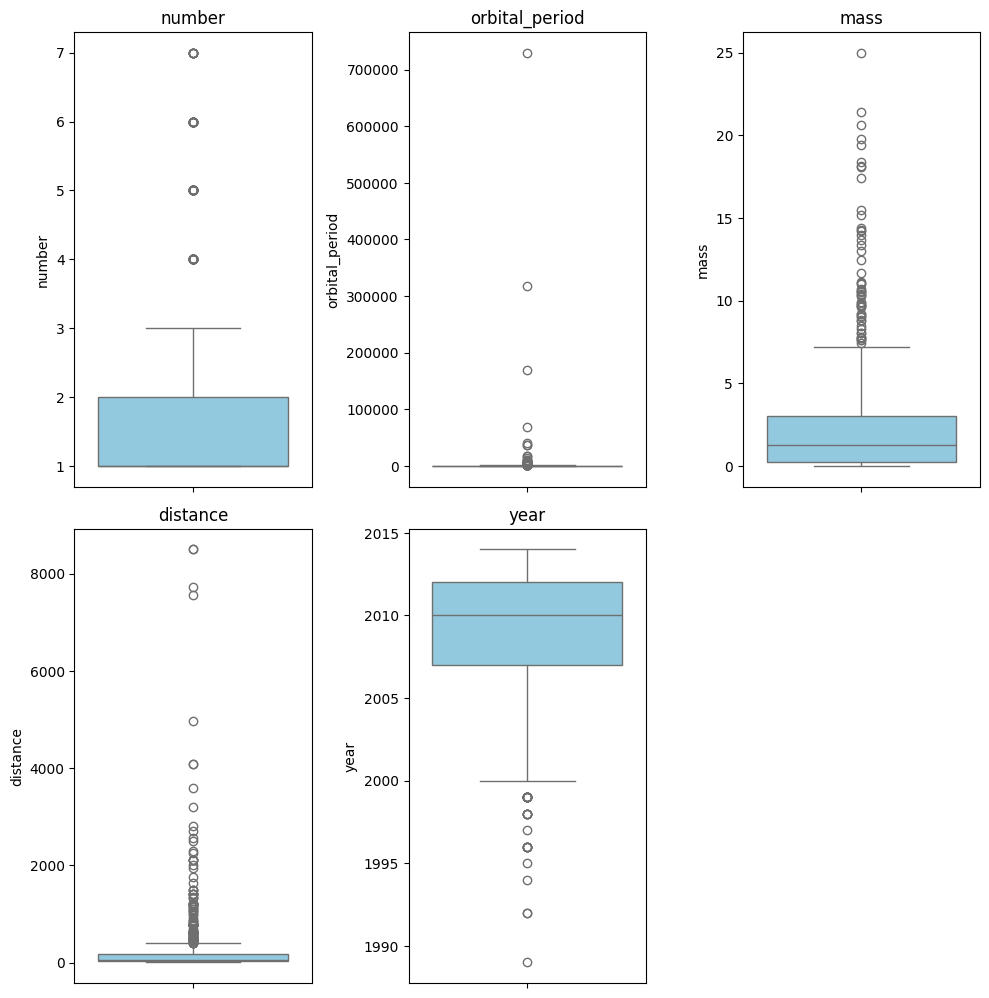

In [13]:
# Crear subdataframe con columnas numericas
numerical_cols = df.select_dtypes(include=np.number).columns

# Crear figura del grafico y ajustar tamaño
plt.figure(figsize=(10, 15))

# Recorrer las columnas y dibujar el subplot dentro de la figura
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Ajusta el tamaño de cada caja
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

*   `Number`: La mayoría de los valores se encuentran entre 1 y 2. Hay algunos valores atípicos fuera de este rango que llegan hasta 7.

*   `Orbital_period`: Los datos tienen una gran cantidad de valores atípicos, con algunos períodos orbitales extremadamente altos.

*   `Mass`: La mayoría de los datos de masa (comparado con Júpiter) están entre 0 y 5, pero hay varios valores que superan esta cifra y llegan hasta alrededor de 25, lo que indica la presencia de objetos con masas significativamente superiores a la media y que pueden desvirtuar mucho el análisis.

*   `Distance`: La mayoría de los valores de distancia están por debajo de 1000, pero existen algunos valores muy altos (cerca de 8000), algo que también puede desvirtuar el conjunto.

*   `Year`: La mayoría de las observaciones están entre 2000 y 2015. Este valor es esperable por la tecnología usada y las mejoras técnicas, además del aumento de programas de busqueda con el paso de los años.

### Análisis de correlación

Se crea una matriz de correlación con las variables numéricas: `number`, `orbital_period`, `mass`, `distance` y `year`.

La matriz muestra la fuerza y dirección de las relaciones lineales entre cada par de estas variables, de manera que se puede mostrar en un mapa de calor para hacerlo más visual.

En general, se puede determinar que no hay una relación lineal clara entre las dos variables. Las variaciones en una variable no tienen una relación directa con las variaciones en la otra.

`number` vs. `year`: La correlación positiva débil (0.1478) puede deberse a que con el tiempo las mejoras tecnológicas y el aumento de los programas de búsqueda hayan permitido descubrir más planetas cada año.

`mass` vs. `distance`: La correlación positiva moderada (0.2741) podría indicar que cuanto más lejos están los planetas detectados, más grandes son debido a la dificultad de observar planetas pequeños debido a la gran distancia.

In [14]:
# Dataframe con las columnas numericas
numeric_df = df.select_dtypes(include=['number'])

numeric_df.corr()

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


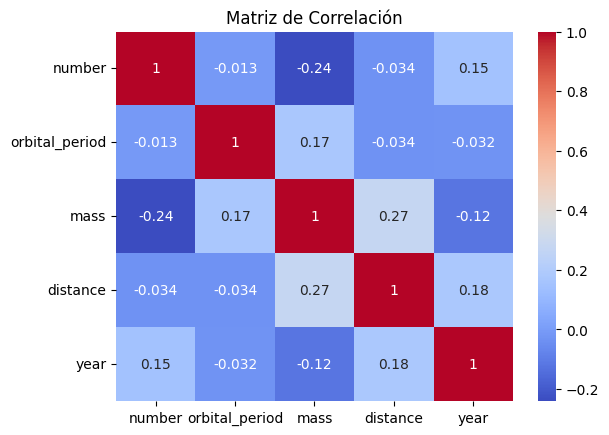

In [15]:
# Dataframe con las columnas numericas
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlación
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title('Matriz de Correlación')
plt.show()

### Análisis de dimensionalidad

[Wikipedia - Análisis de componentes principales](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales)

En este análisis, se explora la reducción de dimensionalidad del conjunto de datos utilizando técnicas como **PCA** (Análisis de Componentes Principales) con el fin de identificar patrones y reducir la complejidad de los datos sin perder información importante.

El PCA es una técnica de reducción de dimensionalidad que transforma un conjunto de variables originales correlacionadas en un nuevo conjunto de variables lineales no correlacionadas, denominadas componentes principales. El objetivo es capturar la mayor parte de la varianza de los datos utilizando un número reducido de componentes.

Al elegir un número de componentes (con n_components), PCA encuentra nuevas variables que son combinaciones lineales de las variables originales. Estas nuevas variables (componentes principales) capturan la mayor cantidad de varianza posible en el menor número de componentes.

El PCA se puede realizar siguiendo dos estrategias:

1.   **Eliminación de filas con valores nulos**: En esta estrategia, se eliminan las filas que contienen valores nulos (NaN) en cualquier columna. Esto puede llevar a la pérdida de registros, pero los datos que se conservan son completos, sin valores faltantes.

2.  **Imputación de valores faltantes**: En lugar de eliminar las filas con valores nulos, se pueden imputar (rellenar) estos valores utilizando técnicas como la media, mediana o moda, o incluso mediante técnicas más avanzadas como la regresión o KNN (K-Nearest Neighbors).

A continuación, se realizan los dos tipos de análisis para valorar los resultados de cada técnica que se emplea.

#### Eliminación de filas con valores nulos

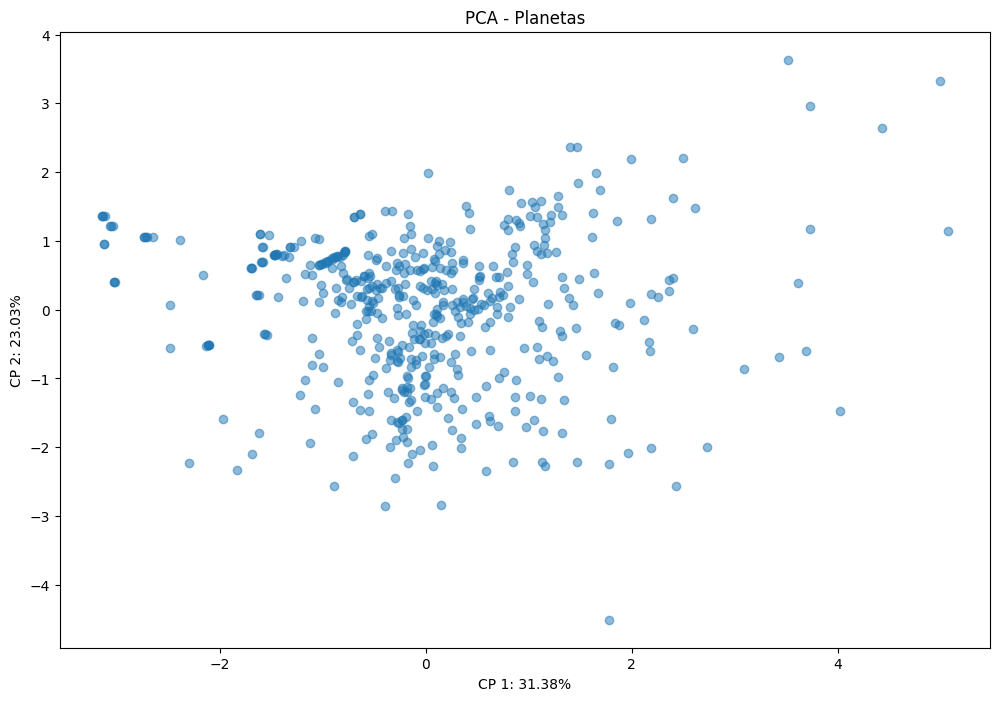

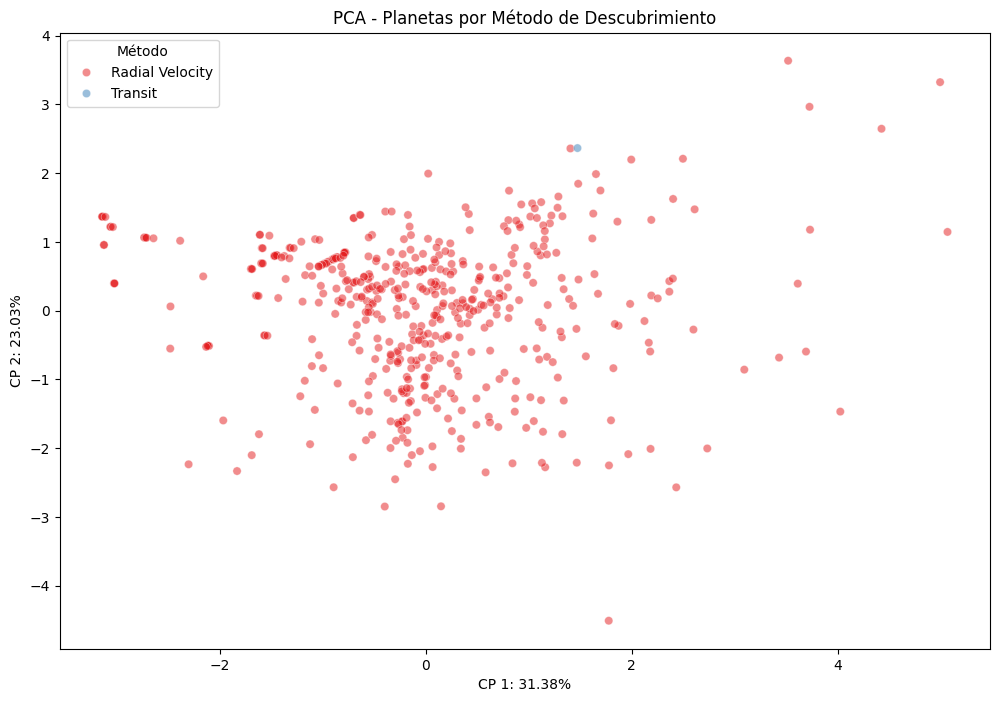

In [36]:
# Dataframe planets a partir del orifinal
planets = df

# Filtrar datos numéricos para PCA eliminando filas con valores nulos
planets_numeric = planets[['number', 'orbital_period', 'mass', 'distance', 'year']].dropna()
planets_methods = planets['method'].iloc[planets_numeric.index]  # Filtrar métodos correspondientes

# Imputar valores faltantes (por ejemplo, con la media)
imputer = SimpleImputer(strategy='mean')
planets_imputed = imputer.fit_transform(planets_numeric)

# Estandarizar los datos (normalizar a media 0 y desviación estándar 1)
scaler = StandardScaler()
planets_scaled = scaler.fit_transform(planets_numeric)

# Crear el modelo PCA
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes a tu necesidad
pca_result = pca.fit_transform(planets_scaled)

# Ver los componentes principales
pca_components = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Crear un DataFrame para las cargas de los componentes principales
components_df = pd.DataFrame(pca.components_, columns=planets_numeric.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Visualizar los resultados
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('CP 1: ' + str(round(explained_variance[0]*100, 2)) + '%')
plt.ylabel('CP 2: ' + str(round(explained_variance[1]*100, 2)) + '%')
plt.title('PCA - Planetas')

print()

# Agrupar por 'method' y agregar el color según el método
plt.figure(figsize=(12, 8))

# Usar un scatter plot con colores según el método
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=planets_methods, palette='Set1', alpha=0.5)

# Etiquetas y título del gráfico
plt.xlabel('CP 1: ' + str(round(explained_variance[0]*100, 2)) + '%')
plt.ylabel('CP 2: ' + str(round(explained_variance[1]*100, 2)) + '%')
plt.title('PCA - Planetas por Método de Descubrimiento')

# Mostrar la leyenda
plt.legend(title='Método', loc='upper left')

# Mostrar el segundo gráfico
plt.show()


In [25]:
print(f"Varianza explicada por cada componente: {explained_variance}\n")
print(f"Total de varianza explicada: {sum(explained_variance)}\n")

# Imprimir la tabla con las cargas de las características
print("Cargas de los componentes principales:")
print(components_df)

# Ordenar las variables por su contribución para cada componente principal
for i in range(pca.n_components_):
    print(f"\nVariables ordenadas por contribución en el Componente Principal {i+1}:")
    print(components_df.iloc[i].sort_values(ascending=False))

Varianza explicada por cada componente: [0.31376637 0.23031111]

Total de varianza explicada: 0.5440774809359598

Cargas de los componentes principales:
       number  orbital_period      mass  distance      year
PC1 -0.562693        0.210991  0.586698  0.541205 -0.041744
PC2  0.133786       -0.024354 -0.216610  0.449429  0.855922

Variables ordenadas por contribución en el Componente Principal 1:
mass              0.586698
distance          0.541205
orbital_period    0.210991
year             -0.041744
number           -0.562693
Name: PC1, dtype: float64

Variables ordenadas por contribución en el Componente Principal 2:
year              0.855922
distance          0.449429
number            0.133786
orbital_period   -0.024354
mass             -0.216610
Name: PC2, dtype: float64


1. **Componente Principal 1 (PC1)**

Explica el **31.38%** de la varianza en los datos. Las variables que más contribuyen a este componente son:

  * `mass` (0.5867): fuerte contribución positiva.
  * `distance` (0.5412): fuerte contribución positiva.
  * `number` (-0.5627): fuerte contribución negativa.

Los datos sugieren que PC1 podría estar relacionado con la masa y la distancia de los planetas, con una influencia negativa de la serie número.

2. **Componente Principal 2 (PC2)**

Explica el **23.03%** de la varianza en los datos. Las variables que más contribuyen a este componente son:

  * `year` (0.8559): fuerte contribución positiva.
  * `distance` (0.4494): contribución positiva.

PC2 parece estar influido principalmente por el año de descubrimiento y en menor medida por la distancia, lo que podría sugerir un componente relacionado con características temporales o la evolución del descubrimiento en función de la distancia.

#### Imputación de valores faltantes

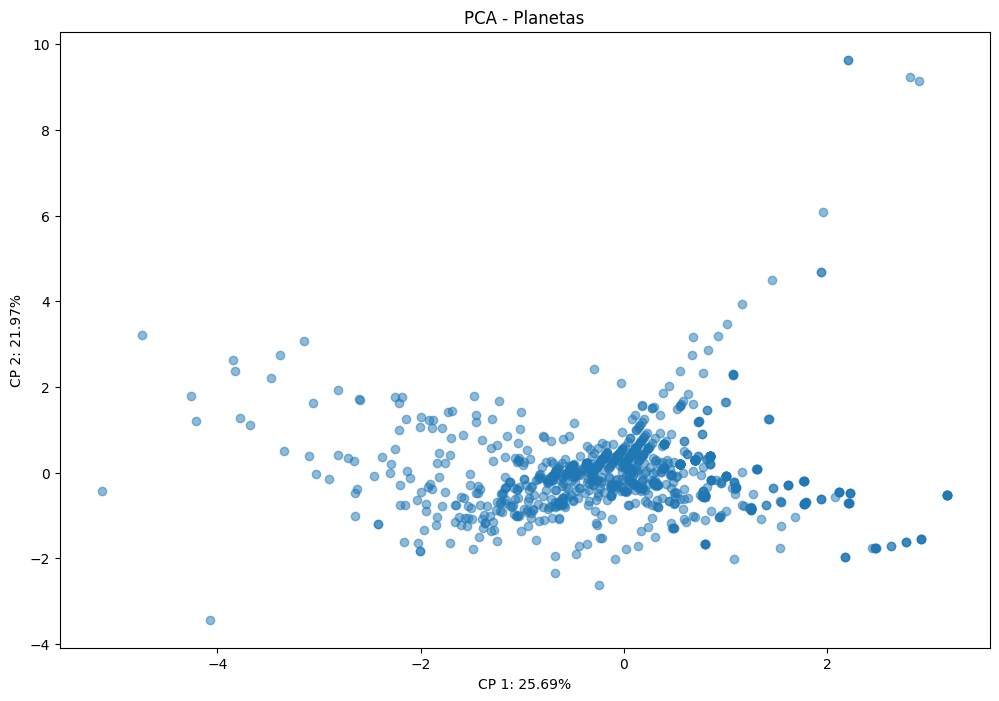

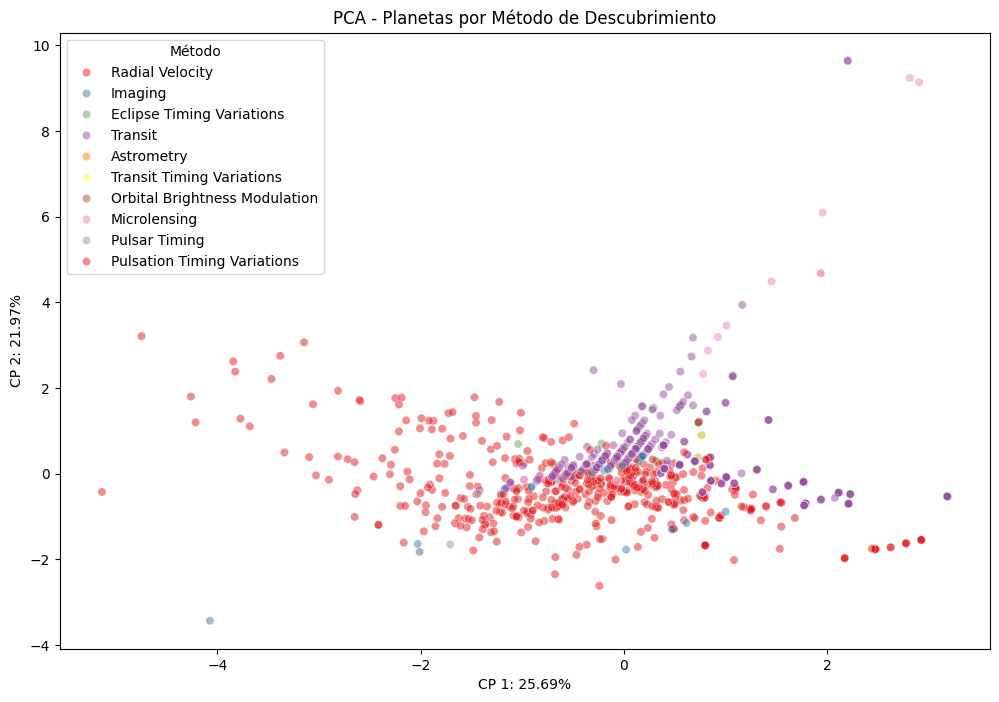

In [35]:
# Dataframe planets a partir del orifinal
planets = df

# Filtrar datos numéricos para PCA
planets_numeric = planets[['number', 'orbital_period', 'mass', 'distance', 'year']]
planets_methods = planets['method'].iloc[planets_numeric.index]  # Filtrar métodos correspondientes

# Imputar valores faltantes (con la media)
imputer = SimpleImputer(strategy='mean')
planets_imputed = imputer.fit_transform(planets_numeric)

# Estandarizar los datos (normalizar a media 0 y desviación estándar 1)
scaler = StandardScaler()
planets_scaled = scaler.fit_transform(planets_imputed)

# Crear el modelo PCA
pca = PCA(n_components=2)  # Puedes ajustar el número de componentes a tu necesidad
pca_result = pca.fit_transform(planets_scaled)

# Ver los componentes principales
pca_components = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Crear un DataFrame para las cargas de los componentes principales
components_df = pd.DataFrame(pca.components_, columns=planets_numeric.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Ver la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Visualizar los resultados
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('CP 1: ' + str(round(explained_variance[0]*100, 2)) + '%')
plt.ylabel('CP 2: ' + str(round(explained_variance[1]*100, 2)) + '%')
plt.title('PCA - Planetas')

# Mostrar el primer grafico
plt.show()

print()

# Agrupar por 'method' y agregar el color según el método
plt.figure(figsize=(12, 8))

# Usar un scatter plot con colores según el método
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=planets_methods, palette='Set1', alpha=0.5)

# Etiquetas y título del gráfico
plt.xlabel('CP 1: ' + str(round(explained_variance[0]*100, 2)) + '%')
plt.ylabel('CP 2: ' + str(round(explained_variance[1]*100, 2)) + '%')
plt.title('PCA - Planetas por Método de Descubrimiento')

# Mostrar la leyenda
plt.legend(title='Método', loc='upper left')

# Mostrar el segundo gráfico
plt.show()


In [27]:
print(f"Varianza explicada por cada componente: {explained_variance}\n")
print(f"Total de varianza explicada: {sum(explained_variance)}\n")

# Imprimir la tabla con las cargas de las características
print("Cargas de los componentes principales:")
print(components_df)

# Ordenar las variables por su contribución para cada componente principal
for i in range(pca.n_components_):
    print(f"\nVariables ordenadas por contribución en el Componente Principal {i+1}:")
    print(components_df.iloc[i].sort_values(ascending=False))

Varianza explicada por cada componente: [0.25686189 0.21966058]

Total de varianza explicada: 0.47652247069028975

Cargas de los componentes principales:
       number  orbital_period      mass  distance      year
PC1  0.569581       -0.113648 -0.497206  0.237375  0.599250
PC2 -0.354333       -0.118587  0.402162  0.760556  0.346707

Variables ordenadas por contribución en el Componente Principal 1:
year              0.599250
number            0.569581
distance          0.237375
orbital_period   -0.113648
mass             -0.497206
Name: PC1, dtype: float64

Variables ordenadas por contribución en el Componente Principal 2:
distance          0.760556
mass              0.402162
year              0.346707
orbital_period   -0.118587
number           -0.354333
Name: PC2, dtype: float64


* **Componente Principal 1 (PC1)**

Explica el 25.69% de la varianza en los datos. Las variables que más contribuyen a este componente son:

  1. `year` (0.5993): fuerte contribución positiva.
  2. `number` (0.5696): fuerte contribución positiva.
  3. `mass` (-0.4972): fuerte contribución negativa.

Estos datos sugieren que el PC1 podría estar relacionado con el año de descubrimiento y el número de planetas, con una influencia negativa de la masa. Esto podría indicar un componente asociado a características temporales y numéricas de los descubrimientos, pero afectado por la masa del planeta.

* **Componente Principal 2 (PC2)**

Explica el 21.97% de la varianza en los datos. Las variables que más contribuyen a este componente son:

  1.  `distance` (0.7606): fuerte contribución positiva.
  2.  `mass` (0.4022): contribución positiva.
  3.  `year` (0.3467): contribución positiva.

PC2 parece estar principalmente influido por la distancia y la masa del planeta, y en menor medida por el año de descubrimiento, lo que sugiere un componente relacionado con características espaciales y, posiblemente, con el progreso en la observación de planetas más distantes a lo largo del tiempo.



### Conclusiones del Análisis

En resumen, los pasos realizados han sido:

1. **Importación de librerías**:
   Se importa `pandas`, `numpy`, `seaborn`, y `matplotlib` para realizar el análisis de los datos y generar las visualizaciones de gráficas.

2. **Revisión de columnas**:
   El conjunto de datos contiene 6 columnas: `method`, `number`, `orbital_period`, `mass`, `distance`, y `year`. No se observan columnas irrelevantes para el análisis inicial.

3. **Análisis estadístico inicial**:
   - **Método `info()`**: Se confirman 1035 entradas, pero algunas columnas tienen valores nulos, como `orbital_period`, `mass`, y `distance`, lo que sugiere que algunos valores faltantes deben ser tratados.
   - **Método `describe()`**: Se observa alta variabilidad en `orbital_period`, `mass`, y `distance`. La mayoría de los exoplanetas fueron descubiertos entre 2000 y 2015.

4. **Distribución de métodos de observación**:
   Se hace recuento de la cantidad de planetas descubiertos por cada método de observación. Se genera un gráfico de barras para visualizar los resultados, llegando a la conclusión  de que los métodos más comunes son 'Radial Velocity' y 'Transit'.

5. **Análisis de outliers**:
   Utilizando diagramas de caja, se identifican valores atípicos en todas las columnas numéricas, especialmente en `orbital_period` y `mass`. Estos valores atípicos podrían influir en el análisis.

6. **Análisis de correlación**:
   Se calcula la matriz de correlación para las variables numéricas del dataset:
   - **`number` vs. `year`**: Correlación débil positiva (0.1478), sugiriendo que las mejoras tecnológicas han permitido descubrir más planetas a lo largo de los años.
   - **`mass` vs. `distance`**: Correlación moderada positiva (0.2741), lo que podría indicar que los planetas más grandes suelen estar más lejos debido a la dificultad de detectar planetas pequeños a grandes distancias.

7. **Análisis de Componentes Principales (PCA)**:
   Se realiza PCA para reducir la dimensionalidad de los datos eliminando los valores nulos y tambien imputando los valores nulos. Los componentes reflejan la relación entre las variables como `mass`, `orbital_period`, `distance`, y `year`.

El análisis muestra que los exoplanetas tienen una gran diversidad en términos de masa, distancia y período orbital sin una fuerte correlación. La evolución de los descubrimientos de exoplanetas está influenciada por la tecnología de observación. La identificación de `outliers` y la relación entre las variables proporciona información interesante para futuros estudios y modelos predictivos.